# Wine Quality Prediction
Classification using Logistic Regression  
### Data Set
This Data set contains the information related to red wine , Various factors affecting the quality. This data set was prepossessed and downloaded from the UCI Machine Learning Repository. This data set was simple, cleaned, practice data set for classification modelling. Source of this Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

Attribute Information:  
Input variables (based on physicochemical tests):  
1. - fixed acidity  
2.  - volatile acidity  
3.  - citric acid   
4.  - residual sugar   
5.  - chlorides   
6.  - free sulfur dioxide   
7.  - total sulfur dioxide  
8.  - density   
9.  - pH  
10.  - sulphates   
11.  - alcohol  
Output variable (based on sensory data):    
12.  - quality ('good' and 'bad' based on score >5 and <5)  

### Analysis Summary
This analysis focuses on finding attributes that significantly affect wine quality classification and training a predictive model to classify wine quality into ```good``` and ```bad``` based on attributes. Analysis is pivoted on the variable ```quality```(target variable). Exploratory data analysis steps like removing null values, observing summary statistics, visualizing the variables, removing oultiers, checking for correlations are carried out.   
  
Following significant correlations are observed. 
- Fixed acidity vs pH : -0.69
- Fixed acidity vs density : 0.69
- fixed acidity vs citric acid : 0.67 
- Volatile acidity vs citric acid : -0.53
- citric acid vs pH : -0.54
- density vs alcohol : -0.51   


A 70-30 split is done to divide dataset into test and train sets.  
10 variables are selected using automated RFE. Further, manual selection is carried out using p-value method. 
Models are build on train data using ```statsmodels.api``` package. 
Final Model is build on the following variables.   
```citric acid```,```fixed acidity```,```volatile acidity```,```alcohol```,```sulphates```,```total sulfur dioxide```  
Variance inflation factor is calculated for all final selection of variables. VIF < 5. No significant Multicollinearity observed. 
   

ROC, Precision-Recall / Sensitivity - Specificity curves have been plotted. The optimum threshold for classification seems to be 0.5   
  
**Model metrics on train data at classification threshold of 0.5 :**   
* Accuracy : 0.752
* Misclassification Rate / Error Rate : 0.248
* Sensitivity / True Positive Rate / Recall : 0.755
* Specificity / True Negative Rate :  0.75
* False Positive Rate : 0.25
* Precision / Positive Predictive Value : 0.777
* Prevalance : 0.535
* Negative Predictive Value 0.726
* Likelihood Ratio : Sensitivity / 1-Specificity : 3.02
* F1-score : 0.766

**Model metrics on test data at classification threshold of 0.5 :**   
* Accuracy : 0.746
* Misclassification Rate / Error Rate : 0.254
* Sensitivity / True Positive Rate / Recall : 0.797
* Specificity / True Negative Rate :  0.688
* False Positive Rate : 0.312
* Precision / Positive Predictive Value : 0.745
* Prevalance : 0.533
* Negative Predictive Value 0.748
* Likelihood Ratio : Sensitivity / 1-Specificity : 2.554
* F1-score : 0.77


 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
data = pd.read_csv('../input/wine-quality-classification/wine_quality_classification.csv', engine='python')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

```quality``` is our target variable. It has two levels - good & bad. No null or missing values. All the other variables are continuous variables. 

### Replacing ```quality``` levels with 0,1

In [6]:
data['quality'] = data['quality'].replace({'good' : 1, 'bad' : 0})

### Summary Statistics

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


### Checking for Outliers

In [8]:
data.quantile(np.linspace(0.90,1,12))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0.900000,10.700000,0.745000,0.522000,3.600000,0.109000,31.000000,93.200000,0.999140,3.510000,0.850000,12.0,1.0
0.909091,10.872727,0.760000,0.537273,3.800000,0.111000,31.000000,96.000000,0.999300,3.520000,0.860000,12.0,1.0
0.918182,11.100000,0.775000,0.550000,4.000000,0.114000,32.000000,99.000000,0.999400,3.530000,0.870000,12.1,1.0
0.927273,11.300000,0.785000,0.560000,4.200000,0.117000,33.000000,102.781818,0.999478,3.540000,0.887818,12.2,1.0
0.936364,11.500000,0.810000,0.580000,4.400000,0.120000,34.000000,106.000000,0.999700,3.543091,0.903091,12.4,1.0
0.945455,11.600000,0.834182,0.590000,4.783636,0.123000,35.000000,110.000000,0.999800,3.560000,0.930000,12.5,1.0
0.954545,11.900000,0.851818,0.630000,5.500000,0.136364,36.000000,115.000000,1.000000,3.573636,0.953636,12.5,1.0
0.963636,12.089091,0.880000,0.640000,5.789091,0.164564,38.000000,121.000000,1.000200,3.590000,0.998909,12.7,1.0
0.972727,12.500000,0.910000,0.660000,6.141818,0.187673,40.000000,129.000000,1.000400,3.610000,1.060000,12.8,1.0
0.981818,12.794545,0.965000,0.680000,6.983636,0.234727,42.945455,136.000000,1.000989,3.660000,1.140000,12.9,1.0


* There are outlier in ```fixed acidity```, ```volatile acidity```, ```citric acid```, ```residual sugar```, ```chlorides```, ```free sulfur dioxide```, ```total sulfur dioxide```, ```pH```, ```sulphates```, ```alcohol```

### Visualizing Independent Variables

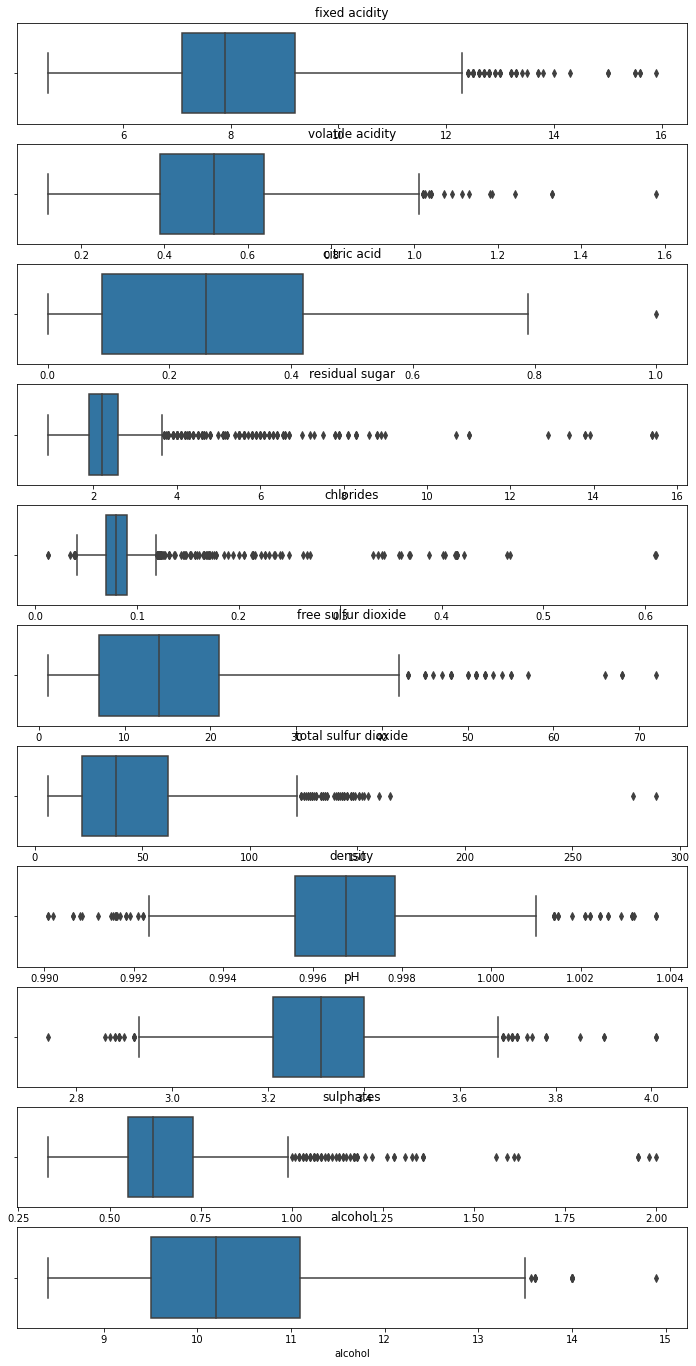

In [9]:
x_vars = data.columns[data.columns != 'quality']
fig,ax = plt.subplots(len(x_vars))
fig.set_figheight(24)
fig.set_figwidth(12)
for num,i in enumerate(x_vars) : 
    ax[num].set_title(i)
    ax[num].set_xlabel('')
    sns.boxplot(data[i],ax=ax[num])

In [10]:
# removing outliers : 
x_vars = data.columns[data.columns != 'quality']
for i in x_vars :
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    upper_extreme = data[i].quantile(0.75) + 1.5*(q3-q1) # q3-q1 is IQR
    lower_extreme = data[i].quantile(0.75) - 1.5*(q3-q1)
    mask =  (data[i] > lower_extreme) & (data[i] < upper_extreme)  # sans outliers
    outliers = data[mask].index
    data.drop(index=outliers)


### Test Train Split

In [11]:
from sklearn.model_selection import train_test_split
y = data.pop('quality')
X = data


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

### Scaling Continuous Variables

In [13]:
# In our case, all the independent variables are continuous
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

# Scaling test set for later use
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

### Correlations

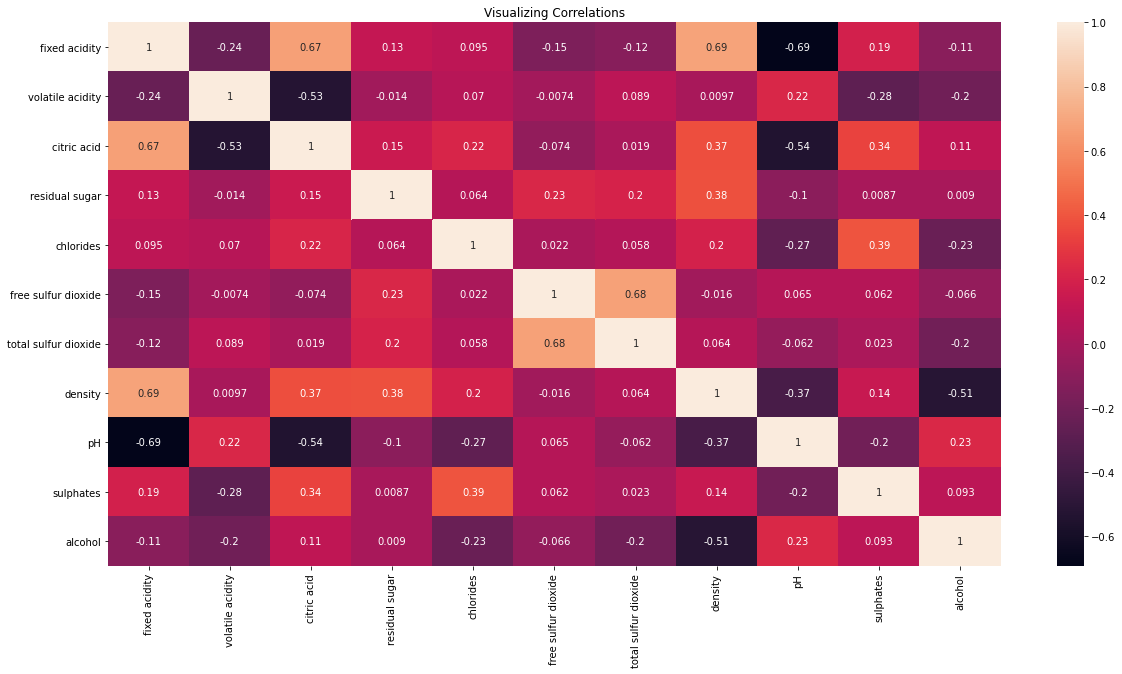

In [14]:
plt.figure(figsize=[20,10])
sns.heatmap(X_train.corr(),annot=True)
plt.title('Visualizing Correlations')
plt.show()

High Correlations : 
- Fixed acidity vs pH : -0.69
- Fixed acidity vs density : 0.69
- fixed acidity vs citric acid : 0.67 
- Volatile acidity vs citric acid : -0.53
- citric acid vs pH : -0.54
- density vs alcohol : -0.51 

### Model Building 

In [15]:
import statsmodels.api as sm

In [16]:
# Logistic Regression Model 
logm1 = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                            GLM   Df Residuals:                     1107
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -570.86
Date:                Sat, 15 Aug 2020   Deviance:                       1141.7
Time:                        14:29:23   Pearson chi2:                 1.08e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2632      0.076      3.478      0.001       0.115       0.411
fixed acidity            0.3550      0.204      1.742      0.082      -0.045       0.755
volatile acidity        -0.5883      0.103     -5.706      0.000      -0.790      -0.386
citric acid             -0.3117      0.132     -2.356      0.018      -0.571      -0.052
residual sugar           0.2039      0.093      2.185      0.029       0.021       0.387
chlorides               -0.1757      0.091     -1.931      0.054      -0.354       0.003
free sulfur dioxide      0.1652      0.107      1.546      0.122      -0.044       0.375
total sulfur dioxide    -0.5286      0.115     -4.584      0.000      -0.755      -0.303
density                 -0.2451      0.186     -1.320      0.187      -0.609       0.119
pH                      -0.0311      0.133     -0.233      0.815      -0.292       0.230
sulphates                0.4795      0.093      5.143      0.000       0.297       0.662
alcohol                  0.9432      0.134      7.014      0.000       0.680       1.207
========================================================================================
"""

### Feature Selection using RFE 

In [17]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [18]:
from sklearn.feature_selection import RFE 
rfe = RFE(logReg,10)
rfe = rfe.fit(X_train,y_train)

In [19]:
## RFE results
rfe_results = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
sorted(rfe_results,key=lambda x : (x[2]))

[('fixed acidity', True, 1),
 ('volatile acidity', True, 1),
 ('citric acid', True, 1),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', True, 1),
 ('total sulfur dioxide', True, 1),
 ('density', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1),
 ('pH', False, 2)]

- RFE results show that ```pH``` can be dropped. 

In [20]:
X_train.drop(columns=['pH'],inplace=True)
X_test.drop(columns=['pH'],inplace=True)


### Assessing Model
#### Model 1

In [21]:
X_train.columns = X_train.columns[X_train.columns !='pH']
logm1 = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                            GLM   Df Residuals:                     1108
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -570.89
Date:                Sat, 15 Aug 2020   Deviance:                       1141.8
Time:                        14:29:24   Pearson chi2:                 1.08e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2631      0.076      3.478      0.001       0.115       0.411
fixed acidity            0.3894      0.141      2.762      0.006       0.113       0.666
volatile acidity        -0.5904      0.103     -5.750      0.000      -0.792      -0.389
citric acid             -0.3128      0.132     -2.367      0.018      -0.572      -0.054
residual sugar           0.2110      0.088      2.389      0.017       0.038       0.384
chlorides               -0.1705      0.088     -1.933      0.053      -0.343       0.002
free sulfur dioxide      0.1609      0.105      1.528      0.127      -0.045       0.367
total sulfur dioxide    -0.5228      0.113     -4.645      0.000      -0.743      -0.302
density                 -0.2686      0.156     -1.722      0.085      -0.574       0.037
sulphates                0.4816      0.093      5.196      0.000       0.300       0.663
alcohol                  0.9287      0.119      7.803      0.000       0.695       1.162
========================================================================================
"""

#### Model 2
- Dropping ```free sulfur dioxide``` because of high p-value

In [22]:
X = X_train.loc[:,X_train.columns != 'free sulfur dioxide']
logm2 = sm.GLM(y_train, sm.add_constant(X),family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                            GLM   Df Residuals:                     1109
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -572.06
Date:                Sat, 15 Aug 2020   Deviance:                       1144.1
Time:                        14:29:24   Pearson chi2:                 1.08e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2687      0.075      3.561      0.000       0.121       0.417
fixed acidity            0.4006      0.141      2.845      0.004       0.125       0.677
volatile acidity        -0.6186      0.102     -6.089      0.000      -0.818      -0.420
citric acid             -0.3548      0.130     -2.738      0.006      -0.609      -0.101
residual sugar           0.2323      0.088      2.629      0.009       0.059       0.406
chlorides               -0.1646      0.088     -1.868      0.062      -0.337       0.008
total sulfur dioxide    -0.4099      0.083     -4.911      0.000      -0.574      -0.246
density                 -0.2762      0.156     -1.771      0.077      -0.582       0.029
sulphates                0.4918      0.093      5.279      0.000       0.309       0.674
alcohol                  0.9411      0.119      7.892      0.000       0.707       1.175
========================================================================================
"""

### Model 3
- dropping ```free sulfur dioxide``` because of high p-value

In [23]:
X = X.loc[:,X.columns != 'free sulfur dioxide']
logm3 = sm.GLM(y_train, sm.add_constant(X),family=sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                            GLM   Df Residuals:                     1109
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -572.06
Date:                Sat, 15 Aug 2020   Deviance:                       1144.1
Time:                        14:29:24   Pearson chi2:                 1.08e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2687      0.075      3.561      0.000       0.121       0.417
fixed acidity            0.4006      0.141      2.845      0.004       0.125       0.677
volatile acidity        -0.6186      0.102     -6.089      0.000      -0.818      -0.420
citric acid             -0.3548      0.130     -2.738      0.006      -0.609      -0.101
residual sugar           0.2323      0.088      2.629      0.009       0.059       0.406
chlorides               -0.1646      0.088     -1.868      0.062      -0.337       0.008
total sulfur dioxide    -0.4099      0.083     -4.911      0.000      -0.574      -0.246
density                 -0.2762      0.156     -1.771      0.077      -0.582       0.029
sulphates                0.4918      0.093      5.279      0.000       0.309       0.674
alcohol                  0.9411      0.119      7.892      0.000       0.707       1.175
========================================================================================
"""

### Model 4 
- Dropping ```density``` because of high p-value

In [24]:
X = X.loc[:,X.columns != 'density']
logm4 = sm.GLM(y_train, sm.add_constant(X),family=sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                            GLM   Df Residuals:                     1110
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -573.64
Date:                Sat, 15 Aug 2020   Deviance:                       1147.3
Time:                        14:29:24   Pearson chi2:                 1.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2590      0.075      3.451      0.001       0.112       0.406
fixed acidity            0.2393      0.107      2.234      0.025       0.029       0.449
volatile acidity        -0.6496      0.101     -6.426      0.000      -0.848      -0.451
citric acid             -0.3570      0.130     -2.747      0.006      -0.612      -0.102
residual sugar           0.1478      0.074      1.998      0.046       0.003       0.293
chlorides               -0.1540      0.088     -1.748      0.080      -0.327       0.019
total sulfur dioxide    -0.4002      0.083     -4.822      0.000      -0.563      -0.238
sulphates                0.4584      0.090      5.090      0.000       0.282       0.635
alcohol                  1.0615      0.099     10.722      0.000       0.867       1.255
========================================================================================
"""

### Model 5 
- dropping ```chlorides``` because of high p-value

In [25]:
X = X.loc[:,X.columns != 'chlorides']
logm5 = sm.GLM(y_train, sm.add_constant(X),family=sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                            GLM   Df Residuals:                     1111
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -575.22
Date:                Sat, 15 Aug 2020   Deviance:                       1150.4
Time:                        14:29:25   Pearson chi2:                 1.11e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2577      0.075      3.438      0.001       0.111       0.405
fixed acidity            0.2787      0.105      2.659      0.008       0.073       0.484
volatile acidity        -0.6975      0.098     -7.105      0.000      -0.890      -0.505
citric acid             -0.4242      0.125     -3.401      0.001      -0.669      -0.180
residual sugar           0.1398      0.073      1.914      0.056      -0.003       0.283
total sulfur dioxide    -0.3884      0.082     -4.712      0.000      -0.550      -0.227
sulphates                0.3856      0.078      4.946      0.000       0.233       0.538
alcohol                  1.1119      0.096     11.633      0.000       0.925       1.299
========================================================================================
"""

### Model 6 
-- Dropping ```residual sugar``` because of high p-value

In [26]:
X = X.loc[:,X.columns != 'residual sugar']
logm6 = sm.GLM(y_train, sm.add_constant(X),family=sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                            GLM   Df Residuals:                     1112
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -577.02
Date:                Sat, 15 Aug 2020   Deviance:                       1154.0
Time:                        14:29:25   Pearson chi2:                 1.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2593      0.075      3.465      0.001       0.113       0.406
fixed acidity            0.2883      0.105      2.753      0.006       0.083       0.494
volatile acidity        -0.6874      0.097     -7.064      0.000      -0.878      -0.497
citric acid             -0.4051      0.124     -3.271      0.001      -0.648      -0.162
total sulfur dioxide    -0.3479      0.079     -4.402      0.000      -0.503      -0.193
sulphates                0.3769      0.078      4.846      0.000       0.224       0.529
alcohol                  1.1186      0.095     11.716      0.000       0.931       1.306
========================================================================================
"""

- All the p-values are very low. So the variable which remain have statistically significant relationships. 

### Checking Multi-Collinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

In [28]:
vif(X)

                  index       vif
3           citric acid  2.735105
1         fixed acidity  2.113091
2      volatile acidity  1.498180
6               alcohol  1.163675
5             sulphates  1.150064
4  total sulfur dioxide  1.121176
0                 const  1.000000


- As we can see, there's no multi collinearity since VIF < 5

### Final Model 

In [29]:
print('Selected columns :' , X.columns)

Selected columns : Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'total sulfur dioxide', 'sulphates', 'alcohol'],
      dtype='object')


In [30]:
logm_final = sm.GLM(y_train, sm.add_constant(X_train[X.columns]),family=sm.families.Binomial())
res = logm_final.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                            GLM   Df Residuals:                     1112
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -577.02
Date:                Sat, 15 Aug 2020   Deviance:                       1154.0
Time:                        14:29:25   Pearson chi2:                 1.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2593      0.075      3.465      0.001       0.113       0.406
fixed acidity            0.2883      0.105      2.753      0.006       0.083       0.494
volatile acidity        -0.6874      0.097     -7.064      0.000      -0.878      -0.497
citric acid             -0.4051      0.124     -3.271      0.001      -0.648      -0.162
total sulfur dioxide    -0.3479      0.079     -4.402      0.000      -0.503      -0.193
sulphates                0.3769      0.078      4.846      0.000       0.224       0.529
alcohol                  1.1186      0.095     11.716      0.000       0.931       1.306
========================================================================================
"""

### Making Predictions on Train Set

In [31]:
selected_vars = X.columns
y_train_pred = res.predict(sm.add_constant(X_train[X.columns]))

In [32]:
print(y_train_pred.head())

858    0.855444
654    0.255470
721    0.172042
176    0.388875
692    0.379338
dtype: float64


### Wine Quality vs Predicted Probability

In [33]:
predictions = pd.DataFrame({'Quality' : y_train.values,'class_probability' : y_train_pred.values.reshape(-1)}, index=X_train.index)
print(predictions.head())

     Quality  class_probability
858        1           0.855444
654        0           0.255470
721        0           0.172042
176        0           0.388875
692        0           0.379338


### Classification Threshold
- Let us assume that any probability < 0.5 is Bad and >0.5 is Good

In [34]:
predictions['Predicted_Quality'] = predictions['class_probability'].apply(lambda x : 1 if x > 0.5 else 0)
print(predictions.head())

     Quality  class_probability  Predicted_Quality
858        1           0.855444                  1
654        0           0.255470                  0
721        0           0.172042                  0
176        0           0.388875                  0
692        0           0.379338                  0


### Simple Metrics

In [35]:
from sklearn import metrics

#### Confusion Matrix

In [36]:
confusion = metrics.confusion_matrix(predictions['Quality'],predictions['Predicted_Quality'])
print(confusion)

[[390 130]
 [147 452]]


- The above result could be interpreted in the following manner 
- a\[i,j\] is the no of times class j was predicted when actual was class i 
- So TN : 390, FP : 130, FN : 147, TP : 452 

|Predicted >   |  0 |  1 |
|---|---|---|
| Actual  |   |   |
|  0 | TN = 390  | FP =130  |
| 1  | FN =147  | TP = 452  |

0 : bad, 1 : good


In [37]:
# Accuracy of the model
print(metrics.accuracy_score(predictions['Quality'],predictions['Predicted_Quality']))

0.7524575513851653


### Metrics beyond Simple Accuracy

In [38]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [39]:
#### Metrics
import math
def model_metrics(TP,TN,FP,FN) : 
    print('Accuracy :' , round((TP + TN)/float(TP+TN+FP+FN),3))
    print('Misclassification Rate / Error Rate :', round((FP + FN)/float(TP+TN+FP+FN),3))
    print('Sensitivity / True Positive Rate / Recall :', round(TP/float(FN + TP),3))
    sensitivity = round(TP/float(FN + TP),3)
    print('Specificity / True Negative Rate : ', round(TN/float(TN + FP),3))
    specificity = round(TN/float(TN + FP),3)
    print('False Positive Rate :',round(FP/float(TN + FP),3))
    print('Precision / Positive Predictive Value :', round(TP/float(TP + FP),3))
    precision = round(TP/float(TP + FP),3)
    print('Prevalance :',round((FN + TP)/float(TP+TN+FP+FN),3))
    print('Negative Predictive Value', round(TN/float(TN + FN),3))
    print('Likelihood Ratio : Sensitivity / 1-Specificity :', round(sensitivity/float(1-specificity) ,3))
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [40]:
model_metrics(TP,TN,FP,FN)

Accuracy : 0.752
Misclassification Rate / Error Rate : 0.248
Sensitivity / True Positive Rate / Recall : 0.755
Specificity / True Negative Rate :  0.75
False Positive Rate : 0.25
Precision / Positive Predictive Value : 0.777
Prevalance : 0.535
Negative Predictive Value 0.726
Likelihood Ratio : Sensitivity / 1-Specificity : 3.02
F1-score : 0.766


### ROC curve

In [41]:
print(predictions.head())

     Quality  class_probability  Predicted_Quality
858        1           0.855444                  1
654        0           0.255470                  0
721        0           0.172042                  0
176        0           0.388875                  0
692        0           0.379338                  0


In [42]:
# generating predictions for cutoffs between 0 and 1
cutoffs = pd.DataFrame()
for i in np.arange(0,1,0.1) : 
    cutoffs[i] = predictions['class_probability'].map(lambda x : 1 if x > i else 0)

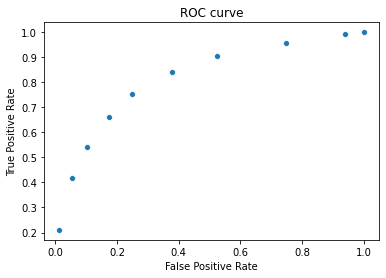

In [43]:
tpr = []
fpr = []
for column in cutoffs.columns : 
    confusion = metrics.confusion_matrix(predictions['Quality'],cutoffs[column])
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    tpr.append(TP/float(TP + FN))
    fpr.append(FP/float(FP + TN))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.scatterplot(fpr,tpr);



### Optimum Cut Off 

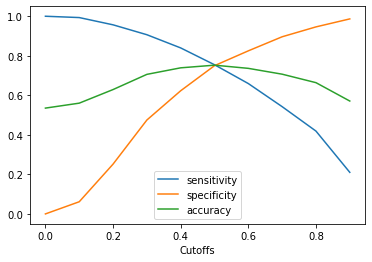

In [44]:
sensitivity = []
specificity = []
accuracy = []
coffs = []
for column in cutoffs.columns : 
    confusion = metrics.confusion_matrix(predictions['Quality'],cutoffs[column])
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sensitivity.append(TP/float(TP + FN))
    specificity.append(1 - FP/float(FP + TN))
    accuracy.append((TP + TN)/(TP + TN + FP + FN))
fig,ax = plt.subplots()
ax.set_xlabel('Cutoffs')
ax.plot(cutoffs.columns,sensitivity,label='sensitivity')
ax.plot(cutoffs.columns,specificity,label='specificity')
ax.plot(cutoffs.columns,accuracy,label='accuracy')
ax.legend(('sensitivity','specificity','accuracy'))
plt.show()

- From the above plot, 0.5 seems like the optimum Threshold for classification

In [45]:
predictions['Final_Predictions'] = predictions['Predicted_Quality'].map(lambda x : 1 if x > 0.5 else 0)

In [46]:
confusion_final = metrics.confusion_matrix(predictions['Quality'],predictions['Final_Predictions'])
TP = confusion_final[1,1]
TN = confusion_final[0,0]
FP = confusion_final[0,1]
FN = confusion_final[1,0]

In [47]:
#### Metrics
model_metrics(TP,TN,FP,FN)

Accuracy : 0.752
Misclassification Rate / Error Rate : 0.248
Sensitivity / True Positive Rate / Recall : 0.755
Specificity / True Negative Rate :  0.75
False Positive Rate : 0.25
Precision / Positive Predictive Value : 0.777
Prevalance : 0.535
Negative Predictive Value 0.726
Likelihood Ratio : Sensitivity / 1-Specificity : 3.02
F1-score : 0.766


### Precision and Recall 

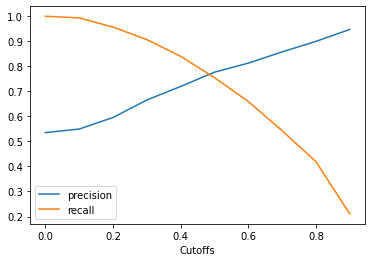

In [48]:
precision = [] # positive predictive power - TP / TP + FP
recall = []   ## same as sensitivity

for column in cutoffs.columns : 
    confusion = metrics.confusion_matrix(predictions['Quality'],cutoffs[column])
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    precision.append(TP/float(TP + FP))
    recall.append(TP/float(FN + TP))

fig,ax = plt.subplots()
ax.set_xlabel('Cutoffs')
ax.plot(cutoffs.columns,precision,label='precision')
ax.plot(cutoffs.columns,recall,label='recall')
ax.legend(('precision','recall'))
plt.show()

In [49]:
# using sklearn utilities 
from sklearn.metrics import precision_score, recall_score
print('Precision',precision_score(predictions['Quality'],predictions['Predicted_Quality']))
print('Recall', recall_score(predictions['Quality'],predictions['Predicted_Quality']))

Precision 0.7766323024054983
Recall 0.7545909849749582


### Predictions on Test set

In [50]:
print(X_test[X.columns].head())

      fixed acidity  volatile acidity  citric acid  total sulfur dioxide  \
1254      -0.302046          0.908335    -1.056968             -0.341840   
1087      -0.244545         -1.905494     0.765915             -0.496144   
822       -0.934554          0.025565    -0.702518             -0.310980   
1514      -0.819552          1.680759    -0.297433              0.583983   
902       -0.532049          0.549710    -0.854425             -0.403562   

      sulphates   alcohol  
1254   0.203567  0.482194  
1087   0.203567  0.766538  
822   -0.099025 -0.560402  
1514   0.385122 -1.097497  
902    0.203567  0.387412  


In [51]:
test_predictions = pd.DataFrame()
X_test_ = X_test[X.columns]
test_predictions['Class_Probabilities'] = res.predict(sm.add_constant(X_test_))

In [52]:
test_predictions['Original'] = y_test
test_predictions.index = y_test.index

In [53]:
# Predictions are made using 0.5 as the threshold
test_predictions['Predicted'] = test_predictions['Class_Probabilities'].map(lambda x : 1 if x > 0.5 else 0)

In [54]:
#### Metrics
TN,FP,FN,TP = metrics.confusion_matrix(test_predictions['Original'],test_predictions['Predicted']).reshape(-1)
model_metrics(TP,TN,FP,FN)
    

Accuracy : 0.746
Misclassification Rate / Error Rate : 0.254
Sensitivity / True Positive Rate / Recall : 0.797
Specificity / True Negative Rate :  0.688
False Positive Rate : 0.312
Precision / Positive Predictive Value : 0.745
Prevalance : 0.533
Negative Predictive Value 0.748
Likelihood Ratio : Sensitivity / 1-Specificity : 2.554
F1-score : 0.77
